In [145]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

from glob import glob
from tqdm.notebook import tqdm

%matplotlib inline

In [146]:
%ls

EDA.ipynb                images_train.txt          train/
families.txt             images_val.txt            val/
images_family_train.txt  images_variant_train.txt  variants.txt
images_family_val.txt    images_variant_val.txt


In [223]:
train_dir = glob("./train/*/*.jpg")

In [224]:
train = [[int(i.split("/")[2]),i] for i in train_dir]

In [225]:
families = open("./families.txt","r").read().split("\n")[:-1]
variants = open("./variants.txt","r").read().split("\n")[:-1]

len(families),len(variants)

(70, 100)

In [226]:
train = [[variants[i-1],j] for i,j in train]

In [227]:
train = pd.DataFrame(train,columns=['variant','image'])

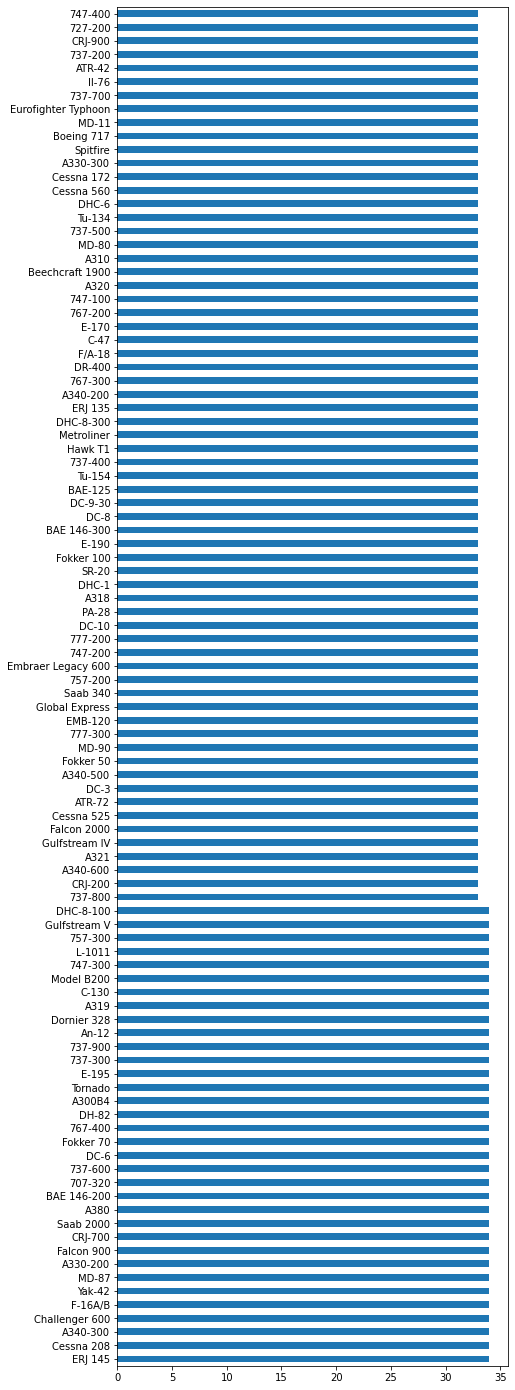

In [254]:
plt.figure(figsize=(7,25))
train.variant.value_counts().plot.barh()

In [229]:
train_fam = pd.DataFrame([
    [i.split(" ")[0]," ".join(i.split(" ")[1:])]
    for 
        i
    in 
        open("./images_family_train.txt","r").read().split("\n")[:-1]
],columns=['id','family'])

train_var = pd.DataFrame([
    [i.split(" ")[0]," ".join(i.split(" ")[1:])]
    for 
        i
    in 
        open("./images_variant_train.txt","r").read().split("\n")[:-1]
],columns=['id','variant'])

In [230]:
train_var.variant.nunique(),train_fam.family.nunique()

(100, 70)

In [231]:
train_var.shape,train_fam.shape

((3334, 2), (3334, 2))

In [232]:
train_var.head()

,id,variant
0,1025794,707-320
1,1340192,707-320
2,0056978,707-320
3,0698580,707-320
4,0450014,707-320


In [233]:
train_fam.head()

,id,family
0,1025794,Boeing 707
1,1340192,Boeing 707
2,0056978,Boeing 707
3,0698580,Boeing 707
4,0450014,Boeing 707


In [234]:
family_var_mapping = train_fam.merge(train_var)

In [235]:
family_var_mapping.head()

,id,family,variant
0,1025794,Boeing 707,707-320
1,1340192,Boeing 707,707-320
2,0056978,Boeing 707,707-320
3,0698580,Boeing 707,707-320
4,0450014,Boeing 707,707-320


In [236]:
mappings = family_var_mapping.groupby('variant')

In [246]:
train['family'] = train.variant.apply(lambda x:mappings.get_group(x).family.values[0])

In [249]:
train.head()

,variant,image,family
0,CRJ-200,./train/0045/000009.jpg,CRJ-200
1,CRJ-200,./train/0045/000031.jpg,CRJ-200
2,CRJ-200,./train/0045/000012.jpg,CRJ-200
3,CRJ-200,./train/0045/000001.jpg,CRJ-200
4,CRJ-200,./train/0045/000010.jpg,CRJ-200


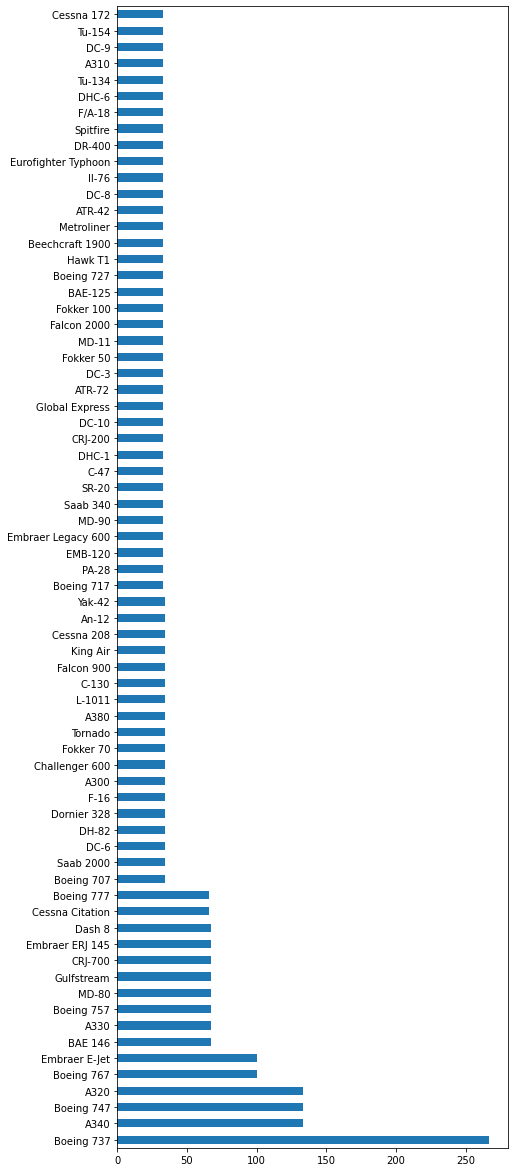

In [255]:
plt.figure(figsize=(7,21))
train.family.value_counts().plot.barh()

In [256]:
H,W = set(),set()

for i in tqdm(train_dir):
    h,w,c = cv2.imread(i).shape
    H.add(h)
    W.add(w)

In [257]:
(max(H),min(H)),(max(W),min(W))

((73, 72), (141, 95))

In [258]:
images = np.array([
    cv2.resize(
        cv2.cvtColor(
            cv2.imread(i),
            cv2.COLOR_BGR2RGB
        ),
        (96,64),
        interpolation=cv2.INTER_CUBIC
    )
    
    for 
        i
    in
        tqdm(train.image.values)
])

In [261]:
train_group = train.groupby("family")

In [262]:
groups = list(train_group.groups.keys())

Family :  A320


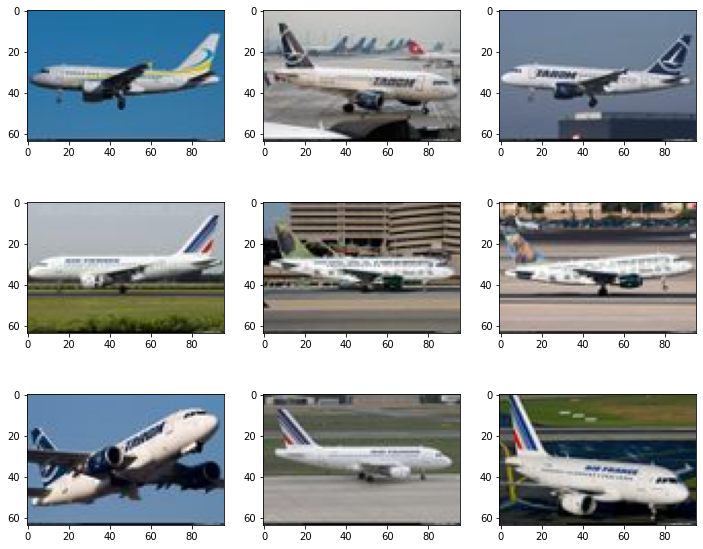

In [273]:
group = groups[2]
index = train_group.get_group(group).index[:9]

fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(12,10)) 
for img,axs in zip(images[index.copy()],axes.reshape(-1)):
    axs.imshow(img)

print ("Family : ",group)